DOC constituent - general EDA, pre-processing

# Hackathon: Will They Claim It ?

---

### Problem Description
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

---

### Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

* Target: Claim Status (Claim)

* Name of agency (Agency)
* Type of travel insurance agencies (Agency.Type)
* Distribution channel of travel insurance agencies (Distribution.Channel)
* Name of the travel insurance products (Product.Name)
* Duration of travel (Duration)
* Destination of travel (Destination)
* Amount of sales of travel insurance policies (Net.Sales)
* The commission received for travel insurance agency (Commission)
* Age of insured (Age)
* The identification record of every observation (ID)

---

### Evaluation Metric
The evaluation metric for this task will be precision_score. Read up about it more here.

---

### Submission Format
The user has to submit a csv file with the ID and Claim label. Sample submission file has been given to you. You can refer the sample submission file.

---


## Import statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
# import bqplot
from palettable.colorbrewer.diverging import *

In [2]:
sns.set(style='whitegrid', palette="Spectral_r")
# dual_colors = [ '#009fca','#00f8b9'] #'#005e79',

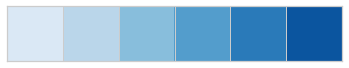

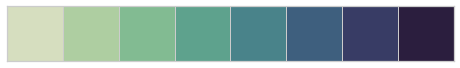

In [3]:
cb_pal = sns.cubehelix_palette(8, start=0.5, rot=-.75)
cpal = sns.color_palette("Blues")
# dual_colors = [cpal[3],cpal[2]]
# sns.set_palette(cpal)
sns.palplot(cpal)
sns.palplot(cb_pal)

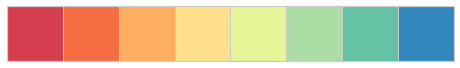

In [4]:
colors = Spectral_8.hex_colors
dual_colors = [colors[-1],colors[4]]
sns.palplot(colors)

In [5]:
sys.path.append("/Users/Aniket/MyStuff/Study/GreyAtom/GeneralFunctions")

In [6]:
import Data_Descriptions as ddsc

In [7]:
import Numerical_EDA as neda

In [8]:
import MultipleClassifiers as mcla

## Functions

In [9]:
def value_definition(columns):
    for col in columns:
        print('Column: ',col)
        print('Value counts:')
        print(credit[col].value_counts(dropna = False))
        print('No. of unique values:')
        print(credit[col].nunique())
        print('-'*15)

## Data Preprocessing

In [10]:
data = pd.read_csv('data/Train.csv')

In [ ]:
# original data set
data_og = data.copy()

In [11]:
# dropping ID
data.drop('ID',axis=1,inplace=True)

In [13]:
data['Claim'] = data['Claim'].astype(object)

In [14]:
bd = ddsc.Data_Descriptions()

In [15]:
bd.basic_descriptions(data)

Rows: 52310 Columns: 10
--------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 10 columns):
Agency                  52310 non-null object
Agency Type             52310 non-null object
Distribution Channel    52310 non-null object
Product Name            52310 non-null object
Duration                52310 non-null int64
Destination             52310 non-null object
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 4.0+ MB
None
--------------------

Descriptive statistics for numerical columns:
           Duration     Net Sales  Commision (in value)           Age
count  52310.000000  52310.000000          52310.000000  52310.000000
mean      58.256108     48.554673             12.219963     39.555725
std      109.138708     60.198589       

In [16]:
print(pd.Series(bd.outliers_count))
print(pd.Series(bd.outliers_count)/data.shape[0]*100)

Duration                5484
Net Sales               5335
Commision (in value)    6394
Age                     3675
dtype: int64
Duration                10.483655
Net Sales               10.198815
Commision (in value)    12.223284
Age                      7.025425
dtype: float64


In [17]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [18]:
data.isnull().sum()/data.shape[0]

Agency                  0.0
Agency Type             0.0
Distribution Channel    0.0
Product Name            0.0
Duration                0.0
Destination             0.0
Net Sales               0.0
Commision (in value)    0.0
Age                     0.0
Claim                   0.0
dtype: float64

Value counts for Column-  Agency :
EPX    50.120436
C2B    20.292487
CWT    13.024278
JZI     8.830052
LWC     1.540814
SSI     1.491111
JWT     1.051424
RAB     1.007456
TST     0.753202
KML     0.598356
ART     0.426305
CCR     0.298222
TTW     0.198815
CBH     0.145288
CSR     0.114701
ADM     0.107054
Name: Agency, dtype: float64


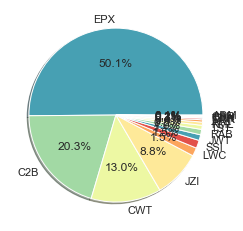

Value counts for Column-  Agency Type :
Travel Agency    66.901166
Airlines         33.098834
Name: Agency Type, dtype: float64


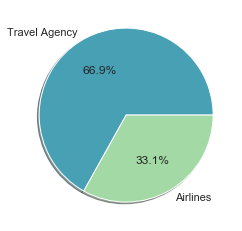

Value counts for Column-  Distribution Channel :
Online     98.296693
Offline     1.703307
Name: Distribution Channel, dtype: float64


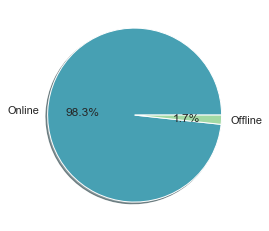

Value counts for Column-  Product Name :
Cancellation Plan                       25.337412
2 way Comprehensive Plan                20.177786
Rental Vehicle Excess Insurance         13.024278
Bronze Plan                              9.028866
Basic Plan                               7.727012
Silver Plan                              5.471229
1 way Comprehensive Plan                 4.605238
Annual Silver Plan                       4.488626
Value Plan                               3.748805
Ticket Protector                         1.491111
Travel Cruise Protect                    0.753202
Gold Plan                                0.726439
Annual Gold Plan                         0.563946
Comprehensive Plan                       0.531447
Single Trip Travel Protect Gold          0.479832
Annual Travel Protect Gold               0.349838
24 Protect                               0.315427
Premier Plan                             0.269547
Single Trip Travel Protect Silver        0.248518
Single Tr

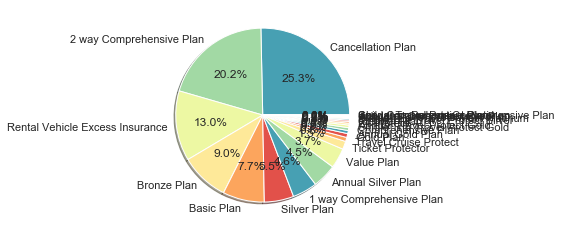

Value counts for Column-  Destination :
SINGAPORE                    27.226152
THAILAND                      8.721086
MALAYSIA                      8.333015
CHINA                         7.472759
AUSTRALIA                     5.756070
INDONESIA                     4.809788
UNITED STATES                 4.198050
PHILIPPINES                   3.435290
HONG KONG                     3.393233
JAPAN                         3.079717
INDIA                         3.051042
VIET NAM                      2.303575
KOREA, REPUBLIC OF            2.202256
UNITED KINGDOM                1.995794
TAIWAN, PROVINCE OF CHINA     1.575225
MYANMAR                       1.129803
BRUNEI DARUSSALAM             1.080099
ITALY                         0.779966
CANADA                        0.751290
NEW ZEALAND                   0.734085
CAMBODIA                      0.688205
FRANCE                        0.638501
GERMANY                       0.619384
NETHERLANDS                   0.579239
SPAIN                   

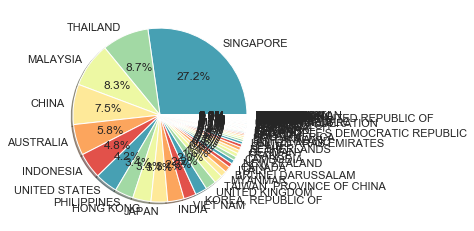

Value counts for Column-  Claim :
0    83.330147
1    16.669853
Name: Claim, dtype: float64


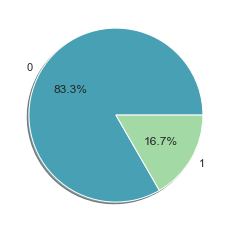

In [19]:
for col in data.select_dtypes(include='object').columns:
    print('Value counts for Column- ',col,':')
    temp = data[col].value_counts(normalize=True)*100
    print(temp)
    plt.pie(temp,labels = temp.index, autopct='%1.1f%%', shadow=True)
    plt.show()
    

#### Inferences:
* Agency- Lower percentage categories should be converted to category - 'Others'; below 8%
* Agency Type - 'Travel Agency' makes 2/3rd of the categores (1/3rd is 'Airlines')
* Distribution Channel - 'Offline' only makes 1.7% of total data; rest is Online
* Product Name - percentage categories should be converted to category - 'Others'; below 3%
* Destination - percentage categories should be converted to category - 'Others'; below 3%
* Claim - 0 -> 83% 1-> 16%

In [20]:
# Transforming Agency counts <8% to 'Others' category
agency_vc_per = data['Agency'].value_counts(normalize=True)*100
agency_others_list = [e for e in agency_vc_per.index if agency_vc_per[e]<8.0]
data['Agency'] = data['Agency'].map(lambda x: x if x not in agency_others_list else 'Other')

EPX      50.120436
C2B      20.292487
CWT      13.024278
JZI       8.830052
Other     7.732747
Name: Agency, dtype: float64


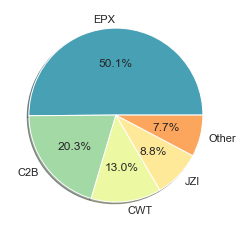

In [21]:
agency_vc_per_others = data['Agency'].value_counts(normalize=True)*100
print(agency_vc_per_others)
plt.pie(agency_vc_per_others, labels = agency_vc_per_others.index, autopct='%1.1f%%', shadow=True)
plt.show()

In [22]:
# Transforming 'Product Name' counts <8% to 'Others' category
productname_vc_per = data['Product Name'].value_counts(normalize=True)*100
productname_others_list = [e for e in productname_vc_per.index if productname_vc_per[e]<3.0]
data['Product Name'] = data['Product Name'].map(lambda x: x if x not in productname_others_list else 'Other')

Cancellation Plan                  25.337412
2 way Comprehensive Plan           20.177786
Rental Vehicle Excess Insurance    13.024278
Bronze Plan                         9.028866
Basic Plan                          7.727012
Other                               6.390747
Silver Plan                         5.471229
1 way Comprehensive Plan            4.605238
Annual Silver Plan                  4.488626
Value Plan                          3.748805
Name: Product Name, dtype: float64


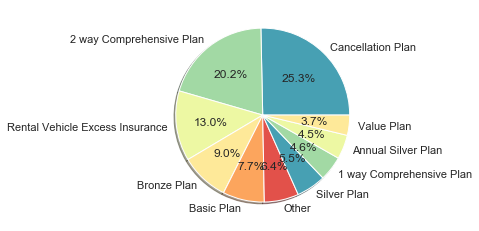

In [23]:
productname_vc_per_others = data['Product Name'].value_counts(normalize=True)*100
print(productname_vc_per_others)
plt.pie(productname_vc_per_others, labels = productname_vc_per_others.index, autopct='%1.1f%%', shadow=True)
plt.show()

In [24]:
# Transforming 'Destination' counts <8% to 'Others' category
destination_vc_per = data['Destination'].value_counts(normalize=True)*100
destination_others_list = [e for e in destination_vc_per.index if destination_vc_per[e]<3.0]
data['Destination'] = data['Destination'].map(lambda x: x if x not in destination_others_list else 'Other')

SINGAPORE        27.226152
Other            20.523800
THAILAND          8.721086
MALAYSIA          8.333015
CHINA             7.472759
AUSTRALIA         5.756070
INDONESIA         4.809788
UNITED STATES     4.198050
PHILIPPINES       3.435290
HONG KONG         3.393233
JAPAN             3.079717
INDIA             3.051042
Name: Destination, dtype: float64


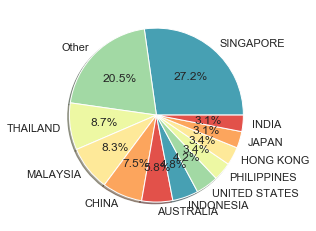

In [25]:
destination_vc_per_others = data['Destination'].value_counts(normalize=True)*100
print(destination_vc_per_others)
plt.pie(destination_vc_per_others, labels = destination_vc_per_others.index, autopct='%1.1f%%', shadow=True)
plt.show()

In [26]:
for col in data.select_dtypes(exclude='object').columns:
    print(col)

Duration
Net Sales
Commision (in value)
Age


#### EDA -  data set specific

Duration :


<Figure size 720x360 with 0 Axes>

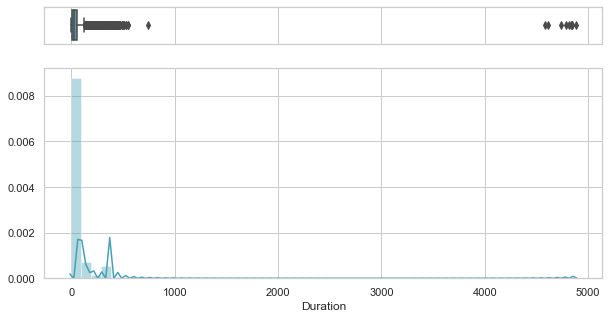

Mean: 58.26
Median: 24.0
Q1: 10.0
Q2: 57.0
Min: -2
Max: 4881
Kurtosis Score: 600.6035322110612
Shapiro Test Score (test statistic, p-value): (0.43224626779556274, 0.0)
P-value for the shapiro test is less than 5%:True


Net Sales :


/Users/Aniket/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 720x360 with 0 Axes>

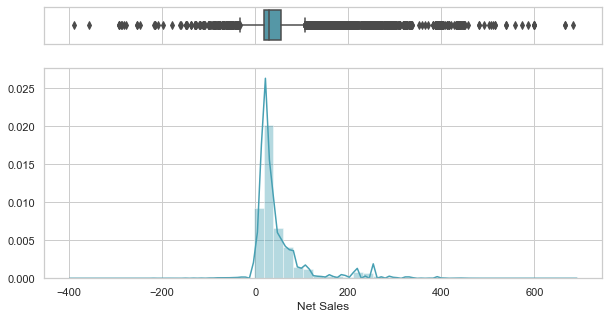

Mean: 48.55
Median: 29.5
Q1: 19.8
Q2: 55.0
Min: -389.0
Max: 682.0
Kurtosis Score: 10.875055001406784
Shapiro Test Score (test statistic, p-value): (0.6663482189178467, 0.0)
P-value for the shapiro test is less than 5%:True


Commision (in value) :


/Users/Aniket/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 720x360 with 0 Axes>

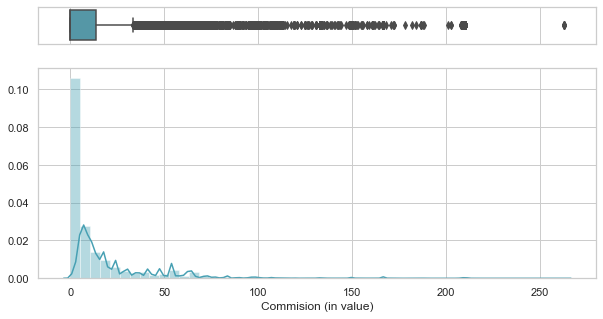

Mean: 12.22
Median: 0.0
Q1: 0.0
Q2: 13.38
Min: 0.0
Max: 262.76
Kurtosis Score: 18.362077911637613
Shapiro Test Score (test statistic, p-value): (0.5847123861312866, 0.0)
P-value for the shapiro test is less than 5%:True


Age :


/Users/Aniket/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 720x360 with 0 Axes>

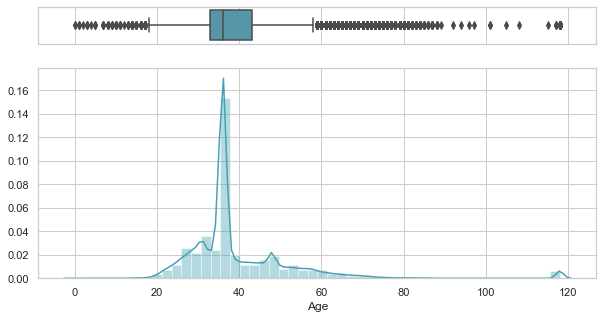

Mean: 39.56
Median: 36.0
Q1: 33.0
Q2: 43.0
Min: 0
Max: 118
Kurtosis Score: 13.140054862533
Shapiro Test Score (test statistic, p-value): (0.7295069694519043, 0.0)
P-value for the shapiro test is less than 5%:True




/Users/Aniket/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [27]:
neda.univariate_numeric(data.select_dtypes(exclude='object'),data.shape[0])

### EDA - Business pov

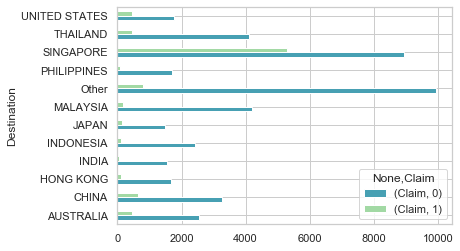

In [100]:
#Destination
data.groupby(["Destination","Claim"])[["Claim"]].count().unstack().plot(kind='barh')
plt.show()

#### Age

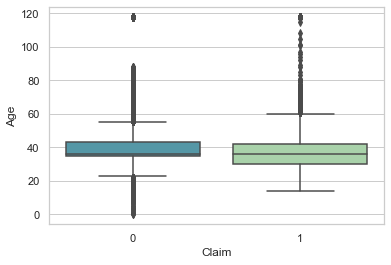

In [38]:
# Age(cont.) v. Claim
sns.boxplot(x='Claim', y='Age',data=data )
plt.show()

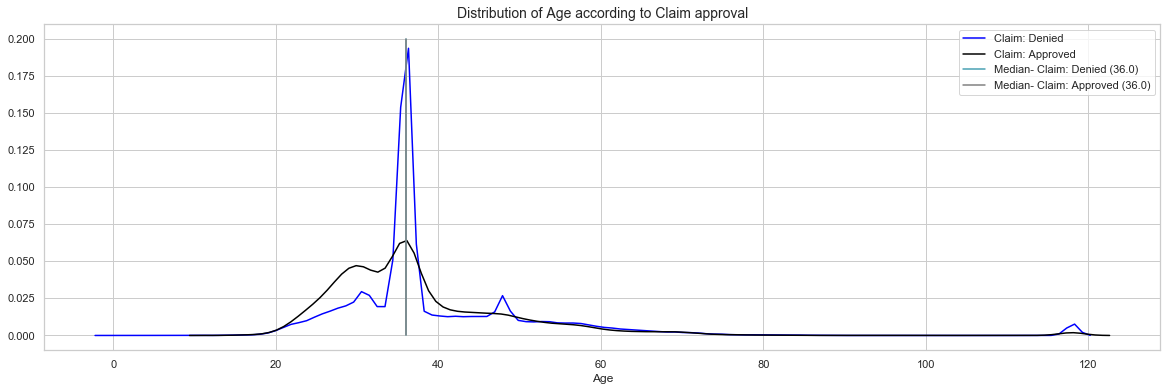

In [101]:
#Age histogram claim (0/1)

plt.figure(figsize=(20,6))
sns.distplot(data_og[data_og['Claim']==0]['Age'], label='Claim: Denied', hist=False, color = 'b')
sns.distplot(data_og[data_og['Claim']==1]['Age'], label='Claim: Approved', hist=False, color = 'black')
med_age_c0 = data_og[data_og['Claim']==0]['Age'].median()
med_age_c1 = data_og[data_og['Claim']==1]['Age'].median()

plt.plot([med_age_c0, med_age_c0], [0, .2],label=f'Median- Claim: Denied ({np.round(med_age_c0,2)})')
plt.plot([med_age_c1, med_age_c1], [0, .2],label=f'Median- Claim: Approved ({np.round(med_age_c1,2)})',color='grey')

plt.legend()
plt.title('Distribution of Age according to Claim approval',fontdict={'fontsize':14})
plt.show()
# print(mean_age_c1)

In [42]:
#Product Name
# data_og.groupby(["Product Name","Claim"])[["Claim"]].count().unstack().plot(kind='barh',figsize=(6,6))

# plt.show()

#### Product Name - Claim

In [43]:
#Product Name
pc_counts = pd.DataFrame(data_og.groupby(["Product Name"])["Claim"].value_counts())
pc_percent = pd.DataFrame(data_og.groupby(["Product Name"])["Claim"].value_counts(normalize=True)*100)
pc_counts.columns = ['Claim_counts']
pc_percent.columns = ['Claim_percent']

In [44]:
pc_percent_ri = pc_percent.copy()
pc_percent_ri.reset_index(inplace=True)
pc_counts_ri = pc_counts.copy()
pc_counts_ri.reset_index(inplace=True)

In [45]:
top10_products_c0_list = list(pc_percent_ri[pc_percent_ri['Claim']==0].sort_values(by='Claim_percent',ascending=False)[:5]['Product Name'])
top10_products_c0_list

['24 Protect',
 'Child Comprehensive Plan',
 'Premier Plan',
 'Cancellation Plan',
 '1 way Comprehensive Plan']

In [46]:
top10_products_c1 = pc_percent_ri[pc_percent_ri['Claim']==1].sort_values(by='Claim_percent',ascending=False)[:10]
# top10_products_c1.set_index('Product Name',inplace=True)
top10_products_c1_list = list(top10_products_c1['Product Name'])
top10_products_c1

,Product Name,Claim,Claim_percent
9,Annual Travel Protect Gold,1,65.573770
7,Annual Silver Plan,1,61.797274
5,Annual Gold Plan,1,58.305085
37,Single Trip Travel Protect Platinum,1,50.000000
33,Silver Plan,1,48.357792
35,Single Trip Travel Protect Gold,1,48.207171
27,Individual Comprehensive Plan,1,44.047619
18,Bronze Plan,1,42.769426
25,Gold Plan,1,37.631579
14,Annual Travel Protect Silver,1,33.695652


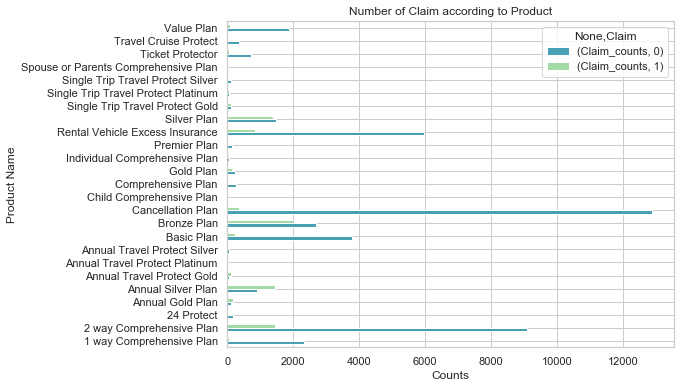

In [47]:
pc_counts.unstack().plot(kind='barh',figsize=(8,6))
plt.title('Number of Claim according to Product')
plt.xlabel('Counts')
plt.show()

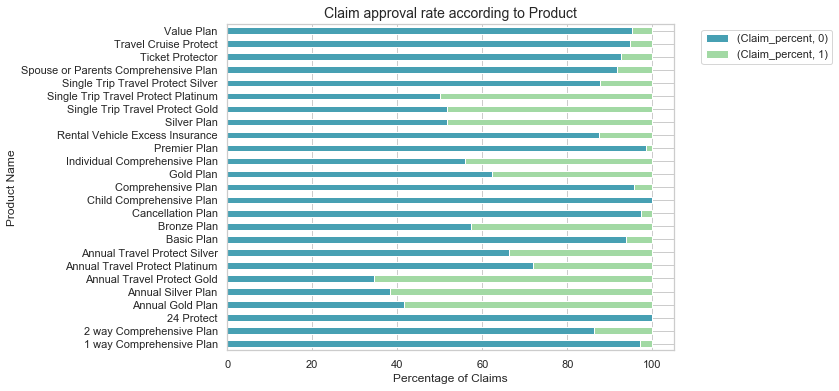

In [48]:
pc_percent.unstack().plot(kind='barh',figsize=(8,6),stacked=True)
plt.title('Claim approval rate according to Product',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [49]:
lis_mi_top10_c1 = []
for x in zip(top10_products_c1_list*2,[0,1]*len(top10_products_c1_list)):
    lis_mi_top10_c1.append(x)
#     print(x)
#     print('---')
#     print(pc_percent.loc[x])
# pc_percent.loc[lis_mi_top10_c1]

In [52]:
# pc_percent.loc[lis_mi_top10_c1].unstack().plot(kind='barh',figsize=(8,6),stacked=True)
# plt.title('Claim approcal rate according to Product',fontdict={'fontsize':14})
# plt.xlabel('Percentage of Claims')
# plt.legend(bbox_to_anchor=(1.05,1))
# plt.show()

In [96]:
# Top 10 Products with highest Claim approval rate - list
top10_products_c1 = top10_products_c1.sort_values('Claim_percent')

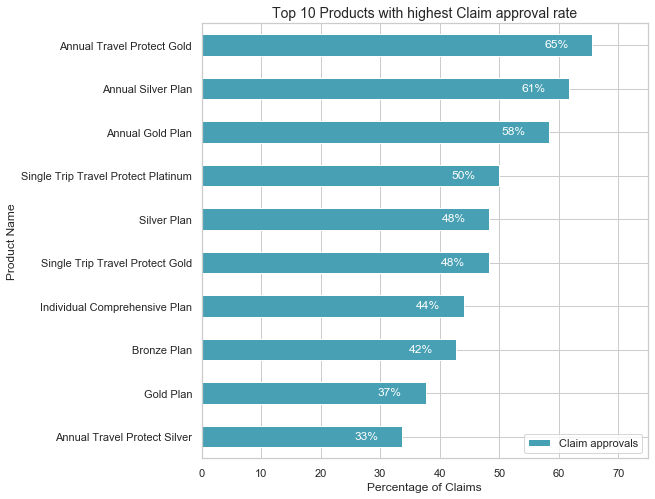

In [97]:
# Top 10 Products with highest Claim approval rate H - final

ax = top10_products_c1.drop('Claim',axis=1).set_index('Product Name').plot(kind='barh',figsize=(8,8))
plt.title('Top 10 Products with highest Claim approval rate',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')
plt.legend(['Claim approvals'])
plt.xlim((0,75))

for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w))+'%', (x+w-8,y+.2),color='white')
plt.show()

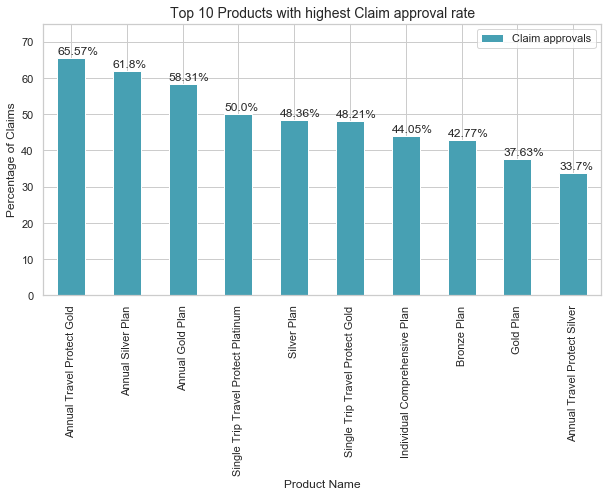

In [54]:
# Top 10 Products with highest Claim approval rate V 

ax = top10_products_c1.drop('Claim',axis=1).set_index('Product Name').plot(kind='bar',figsize=(10,5))
plt.title('Top 10 Products with highest Claim approval rate',fontdict={'fontsize':14})
plt.ylabel('Percentage of Claims')
plt.legend(['Claim approvals'])
plt.ylim((0,75))

# dff_ri = dff.reset_index().set_index('product_name')


# ax = dff[    (dff['product_name'] == list_top10[0])|
#              (dff['product_name'] == list_top10[1])|
#              (dff['product_name'] == list_top10[2])|
#              (dff['product_name'] == list_top10[3])|
#              (dff['product_name'] == list_top10[4])|
#              (dff['product_name'] == list_top10[5])|
#              (dff['product_name'] == list_top10[6])|
#              (dff['product_name'] == list_top10[7])|
#              (dff['product_name'] == list_top10[8])|
#              (dff['product_name'] == list_top10[9])
#         ].unstack().plot(kind="bar", figsize=(10,8))

for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+'%', (x,y+h+1))
plt.show()

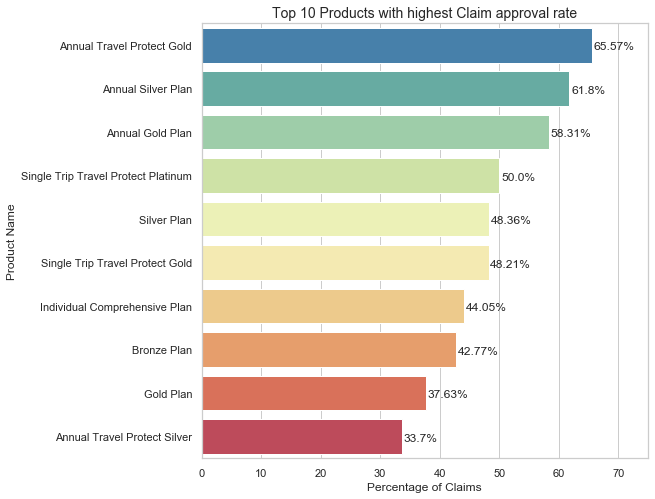

In [55]:
# Top 10 Products with highest Claim approval rate H/spectral

fig = plt.figure(figsize=(8,8))
ax = sns.barplot(y='Product Name', x='Claim_percent',data=top10_products_c1,palette='Spectral_r')
plt.title('Top 10 Products with highest Claim approval rate',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')
plt.xlim((0,75))

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.3
    _y = p.get_y() + p.get_height() - 0.3
    value = str(np.round(p.get_width(),2))+'%'
    ax.text(_x, _y, value, va="baseline", ha='left')
#     w,h = p.get_width(), p.get_height()
#     x,y = p.get_xy()
#     ax.text(x+w-3,y,str(np.round(w,2))+'%')
# for index, row in top10_products_c1.iterrows():
#     ax.text(row['Claim_percent'], row.name, round(row['Claim_percent'],2), color='black')
plt.show()

In [56]:
for index, row in top10_products_c1.iterrows():
    print(row['Claim_percent'], row.name, round(row['Claim_percent'],2))

65.57377049180327 9 65.57
61.797274275979554 7 61.8
58.30508474576271 5 58.31
50.0 37 50.0
48.35779175401817 33 48.36
48.20717131474104 35 48.21
44.047619047619044 27 44.05
42.76942621215329 18 42.77
37.631578947368425 25 37.63
33.69565217391305 14 33.7


In [57]:
# sns.boxplot(x='Claim', y='Duration',data=data,fliersize=0 )
# plt.xlim(500)
# plt.show()

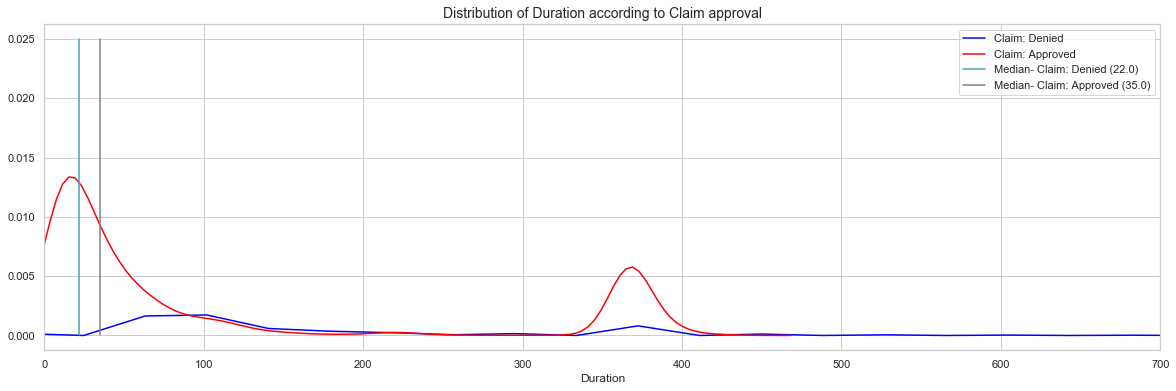

In [103]:
#Duration histogram claim (0/1)

plt.figure(figsize=(20,6))
sns.distplot(data_og[data_og['Claim']==0]['Duration'], label='Claim: Denied', hist=False, color = 'b')
sns.distplot(data_og[data_og['Claim']==1]['Duration'], label='Claim: Approved', hist=False, color = 'r')
med_dur_c0 = data_og[data_og['Claim']==0]['Duration'].median()
med_dur_c1 = data_og[data_og['Claim']==1]['Duration'].median()

plt.plot([med_dur_c0, med_dur_c0], [0, .025],label=f'Median- Claim: Denied ({np.round(med_dur_c0,2)})')
plt.plot([med_dur_c1, med_dur_c1], [0, .025],label=f'Median- Claim: Approved ({np.round(med_dur_c1,2)})',color='grey')
plt.xlim((0,700))
plt.legend()
plt.title('Distribution of Duration according to Claim approval',fontdict={'fontsize':14})
plt.show()
# # print(mean_age_c1)

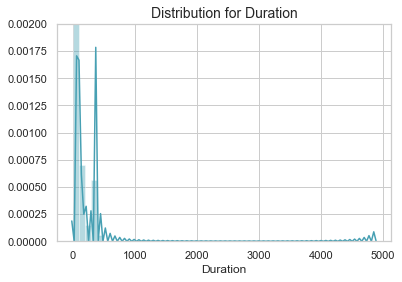

In [104]:
# Duration histogram
sns.distplot(data_og['Duration'])
plt.ylim((0,0.002))
plt.title('Distribution for Duration',fontdict={'fontsize':14})
plt.show()

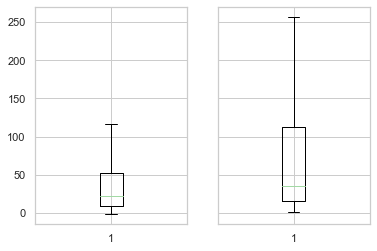

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.boxplot(data[data['Claim'] == 0]['Duration'],showfliers=False)
ax2.boxplot(data[data['Claim'] == 1]['Duration'],showfliers=False)

plt.show()

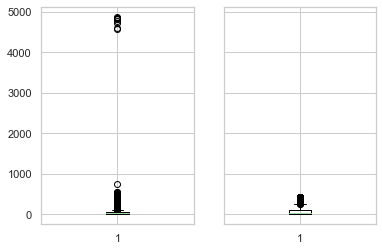

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.boxplot(data[data['Claim'] == 0]['Duration'],showfliers=True)
ax2.boxplot(data[data['Claim'] == 1]['Duration'],showfliers=True)

plt.show()

In [60]:
#Dest - Duration agg
data.groupby(["Destination"])[["Duration"]].agg(['min','max','mean','median','sum'])

Duration                                 
                   min   max       mean median      sum
Destination                                            
AUSTRALIA            1   440  46.129857     30   138897
CHINA                1   472  39.662829     21   155042
HONG KONG            1   366  33.967887     21    60293
INDIA                0   326  32.151003     20    51313
INDONESIA           -1   466  32.412560     17    81550
JAPAN                1   327  53.990689     36    86979
MALAYSIA            -1   368  26.532920     12   115657
Other               -2   364  47.762202     29   512775
PHILIPPINES          1   326  47.729549     32    85770
SINGAPORE            0  4881  99.162477     25  1412272
THAILAND             0   328  32.988382     20   150493
UNITED STATES        1   531  89.406193     46   196336

In [61]:
#"Product Name" v. duration agg
data.groupby(["Product Name"])[["Duration"]].agg(['min','max','mean','median','sum','count'])

Duration                                   \
                                     min   max        mean median     sum   
Product Name                                                                
1 way Comprehensive Plan               0   281   22.659610     11   54587   
2 way Comprehensive Plan               1   328   45.217717     29  477273   
Annual Silver Plan                   364   740  372.945060    367  875675   
Basic Plan                            -2   326   33.555171     20  135630   
Bronze Plan                            0   402   26.778319     16  126474   
Cancellation Plan                      1   330   39.263619     22  520400   
Other                                  0  4881  127.486389     39  426187   
Rental Vehicle Excess Insurance        0   430   41.354029     25  281745   
Silver Plan                            0   309   30.240741     17   86549   
Value Plan                             0   327   32.053544     19   62857   

                                        
                                 count  
Product Name                            
1 way Comprehensive Plan          2409  
2 way Comprehensive Plan         10555  
Annual Silver Plan                2348  
Basic Plan                        4042  
Bronze Plan                       4723  
Cancellation Plan                13254  
Other                             3343  
Rental Vehicle Excess Insurance   6813  
Silver Plan                       2862  
Value Plan                        1961

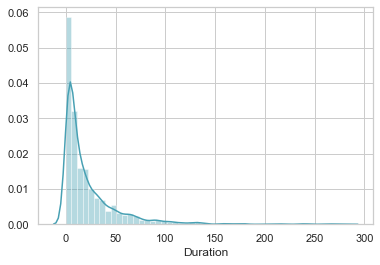

In [62]:
# Checking single plan product '1 way Comprehensive Plan'
data["Product Name"] == '1 way Comprehensive Plan']
sns.distplot(d1.Duration)
plt.show()


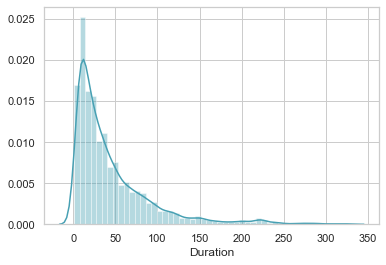

In [64]:
# Checking single plan product '2 way Comprehensive Plan'


d1 = data[data["Product Name"] == '2 way Comprehensive Plan']
sns.distplot(d1.Duration)
plt.show()


In [65]:
print(d1.groupby('Destination')['Duration'].agg(['min','max','mean','median','sum','count']))

               min  max       mean  median     sum  count
Destination                                              
AUSTRALIA        4  286  53.669935    37.0   16423    306
CHINA            2  292  40.905190    26.0   59108   1445
HONG KONG        3  321  36.203938    23.0   25741    711
INDIA            2  326  42.032922    30.0   10214    243
INDONESIA        2  279  36.678524    22.0   27839    759
JAPAN            4  327  68.046332    47.0   35248    518
MALAYSIA         1  327  26.879348    12.0   24729    920
Other            1  323  53.091081    34.0  140479   2646
PHILIPPINES      2  318  55.453488    43.5   33383    602
SINGAPORE        2  238  42.824257    31.5   17301    404
THAILAND         2  328  35.632440    24.0   47890   1344
UNITED STATES    3  280  59.235921    48.0   38918    657


In [66]:
data.groupby(['Agency Type'])['Claim'].value_counts(normalize=True)*100

Agency Type    Claim
Airlines       0        68.106734
               1        31.893266
Travel Agency  0        90.861813
               1         9.138187
Name: Claim, dtype: float64

In [67]:
data.groupby(['Agency'])['Claim'].value_counts(normalize=True)*100

Agency  Claim
C2B     0        51.229392
        1        48.770608
CWT     0        87.553207
        1        12.446793
EPX     0        92.829354
        1         7.170646
JZI     0        94.457675
        1         5.542325
Other   0        86.180470
        1        13.819530
Name: Claim, dtype: float64

#### Which agency has better claim rate?

In [68]:
data.groupby(['Agency'])['Claim'].value_counts()

Agency  Claim
C2B     0         5438
        1         5177
CWT     0         5965
        1          848
EPX     0        24338
        1         1880
JZI     0         4363
        1          256
Other   0         3486
        1          559
Name: Claim, dtype: int64

In [69]:
data.groupby(['Agency'])['Claim'].value_counts(normalize=True)*100

Agency  Claim
C2B     0        51.229392
        1        48.770608
CWT     0        87.553207
        1        12.446793
EPX     0        92.829354
        1         7.170646
JZI     0        94.457675
        1         5.542325
Other   0        86.180470
        1        13.819530
Name: Claim, dtype: float64

#### Which agency type provides which product? (agg: commission, net sale)

In [70]:
data.groupby(['Agency Type','Product Name'])[['Net Sales','Commision (in value)']].agg(['min','max','mean','median'])

Net Sales                      \
                                                    min     max        mean   
Agency Type   Product Name                                                    
Airlines      Annual Silver Plan                -389.00  432.00  225.598643   
              Basic Plan                         -69.00  179.00   26.544246   
              Bronze Plan                       -281.00  682.00   35.181802   
              Other                             -357.50  666.00   88.009008   
              Silver Plan                        -70.85  557.40   59.400097   
              Value Plan                        -138.00  420.00   47.701036   
Travel Agency 1 way Comprehensive Plan           -84.00  112.00   27.502427   
              2 way Comprehensive Plan          -112.00  192.00   43.871924   
              Cancellation Plan                 -128.00  128.00   26.303287   
              Other                             -147.00  404.25   80.605064   
              Rental Vehicle Excess Insurance   -287.10  297.00   46.103047   
              Value Plan                        -130.00  279.00   46.306573   

                                                           \
                                                   median   
Agency Type   Product Name                                  
Airlines      Annual Silver Plan               216.000000   
              Basic Plan                        22.000000   
              Bronze Plan                       27.000000   
              Other                             13.500000   
              Silver Plan                       47.234487   
              Value Plan                        39.000000   
Travel Agency 1 way Comprehensive Plan          20.000000   
              2 way Comprehensive Plan          32.807781   
              Cancellation Plan                 18.000000   
              Other                             30.000000   
              Rental Vehicle Excess Insurance   39.600000   
              Value Plan                        29.361087   

                                              Commision (in value)  \
                                                               min   
Agency Type   Product Name                                           
Airlines      Annual Silver Plan                         40.250000   
              Basic Plan                                  6.300000   
              Bronze Plan                                 2.880000   
              Other                                       0.020000   
              Silver Plan                                 3.750000   
              Value Plan                                  5.175985   
Travel Agency 1 way Comprehensive Plan                    0.000000   
              2 way Comprehensive Plan                    0.000000   
              Cancellation Plan                           0.000000   
              Other                                       0.000000   
              Rental Vehicle Excess Insurance             4.262521   
              Value Plan                                  2.812179   

                                                                      \
                                                      max       mean   
Agency Type   Product Name                                             
Airlines      Annual Silver Plan               108.000000  57.291729   
              Basic Plan                        62.650000   9.591361   
              Bronze Plan                      170.500000   9.051029   
              Other                            166.500000  23.117480   
              Silver Plan                      139.350000  15.150403   
              Value Plan                       168.000000  18.478316   
Travel Agency 1 way Comprehensive Plan           9.664093   0.018054   
              2 way Comprehensive Plan          29.192631   0.026359   
              Cancellation Plan                 24.467261   0.007396   
              Other          

#### Which agency type provides which product? (claim rate)

In [71]:
pd.DataFrame(data.groupby(['Agency Type','Product Name'])['Claim'].value_counts(normalize=True)*100)

Claim
Agency Type   Product Name                    Claim           
Airlines      Annual Silver Plan              1      61.797274
                                              0      38.202726
              Basic Plan                      0      93.913904
                                              1       6.086096
              Bronze Plan                     0      57.230574
                                              1      42.769426
              Other                           0      77.093596
                                              1      22.906404
              Silver Plan                     0      51.642208
                                              1      48.357792
              Value Plan                      0      97.142857
                                              1       2.857143
Travel Agency 1 way Comprehensive Plan        0      97.177252
                                              1       2.822748
              2 way Comprehensive Plan        0      86.196116
                                              1      13.803884
              Cancellation Plan               0      97.321563
                                              1       2.678437
              Other                           0      75.276323
                                              1      24.723677
              Rental Vehicle Excess Insurance 0      87.553207
                                              1      12.446793
              Value Plan                      0      81.707317
                                              1      18.292683

#### Which agency type provides which product? (agg: commission, net sale)

In [72]:
for ag in data.Agency.unique():
    print(ag)
    print(data[data.Agency == ag].groupby(['Agency','Product Name'])
          [['Net Sales','Commision (in value)']].agg(['min','max','mean','median']))
    print('---')

EPX
                                Net Sales                               \
                                      min    max       mean     median   
Agency Product Name                                                      
EPX    1 way Comprehensive Plan     -84.0  112.0  27.502427  20.000000   
       2 way Comprehensive Plan    -112.0  192.0  43.871924  32.807781   
       Cancellation Plan           -128.0  128.0  26.303287  18.000000   

                                Commision (in value)                       \
                                                 min        max      mean   
Agency Product Name                                                         
EPX    1 way Comprehensive Plan                  0.0   9.664093  0.018054   
       2 way Comprehensive Plan                  0.0  29.192631  0.026359   
       Cancellation Plan                         0.0  24.467261  0.007396   

                                        
                                median  
Agency

In [109]:
### Group by - 'Agency','Agency Type','Product Name' and checking claim rate (w/ others)

# for ag in data.Agency.unique():
#     print(ag)
#     print(data[data.Agency == ag].groupby(['Agency','Agency Type','Product Name'])['Claim'].value_counts(normalize=True)*100)
#     print('---')

### Group by - 'Agency','Agency Type','Product Name' and checking claim rate (w/o others)

In [108]:
for ag in data_og.Agency.unique():
    print(ag)
    print(data_og[data_og.Agency == ag].groupby(['Agency','Agency Type','Product Name'])['Claim'].value_counts(normalize=True)*100)
    print('---'*25)

EPX
Agency  Agency Type    Product Name              Claim
EPX     Travel Agency  1 way Comprehensive Plan  0        97.177252
                                                 1         2.822748
                       2 way Comprehensive Plan  0        86.196116
                                                 1        13.803884
                       Cancellation Plan         0        97.321563
                                                 1         2.678437
Name: Claim, dtype: float64
---------------------------------------------------------------------------
CWT
Agency  Agency Type    Product Name                     Claim
CWT     Travel Agency  Rental Vehicle Excess Insurance  0        87.553207
                                                        1        12.446793
Name: Claim, dtype: float64
---------------------------------------------------------------------------
JZI
Agency  Agency Type  Product Name  Claim
JZI     Airlines     Basic Plan    0         93.913904
         

In [75]:
pd.DataFrame(data.groupby(['Agency Type','Distribution Channel'])['Claim'].value_counts(normalize=True)*100)

Claim
Agency Type   Distribution Channel Claim            
Airlines      Offline              0      100.000000
              Online               0       68.079080
                                   1       31.920920
Travel Agency Offline              0       86.872146
                                   1       13.127854
              Online               0       90.964244
                                   1        9.035756

In [76]:
pd.DataFrame(data_og.groupby(['Agency Type'])['Claim'].value_counts())

Claim
Agency Type   Claim       
Airlines      0      11792
              1       5522
Travel Agency 0      31798
              1       3198

In [77]:
pd.DataFrame(data_og.groupby(['Agency Type','Agency'])['Claim'].value_counts())

Claim
Agency Type   Agency Claim       
Airlines      ART    0        223
              C2B    0       5438
                     1       5177
              JWT    0        519
                     1         31
              JZI    0       4363
                     1        256
              RAB    0        526
                     1          1
              SSI    0        723
                     1         57
Travel Agency ADM    0         56
              CBH    0         75
                     1          1
              CCR    0        146
                     1         10
              CSR    0         59
                     1          1
              CWT    0       5965
                     1        848
              EPX    0      24338
                     1       1880
              KML    0        266
                     1         47
              LWC    0        454
                     1        352
              TST    0        373
                     1         21
              TTW    0         66
                     1         38

#### Agency Type - Claim Rate 

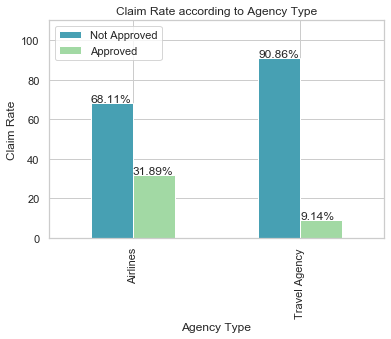

In [111]:
# bar
atcr = pd.DataFrame(data_og.groupby(['Agency Type'])['Claim'].value_counts(normalize=True)*100)
atcr.columns = ['Claim Rate']
ax = atcr.unstack().plot(kind='bar')
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+"%", (x,y+h+0.5))
# plt.xlabel("Age group")
plt.ylabel("Claim Rate")
plt.title("Claim Rate according to Agency Type")
plt.legend(['Not Approved','Approved'],loc='upper left')
plt.ylim((0,110))
plt.show()

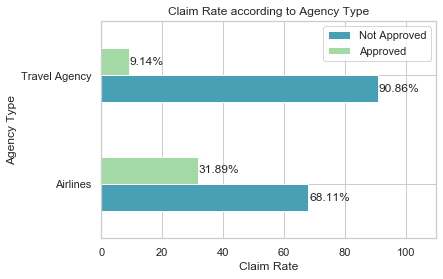

In [79]:
# barh
atcr = pd.DataFrame(data_og.groupby(['Agency Type'])['Claim'].value_counts(normalize=True)*100)
atcr.columns = ['Claim Rate']
ax = atcr.unstack().plot(kind='barh')
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(w,2))+"%", (x+w+.2,y+.1))
# plt.xlabel("Age group")
plt.xlabel("Claim Rate")
plt.title("Claim Rate according to Agency Type")
plt.legend(['Not Approved','Approved'],loc='upper right')
plt.xlim((0,110))
plt.show()

In [80]:
atcr.reset_index(inplace=True)

In [81]:
# claim labels for Claim: 0/1
claim_labels = ['Claim: Denied','Claim: Approved']

#### Pie Charts Agency Type - Claim rate

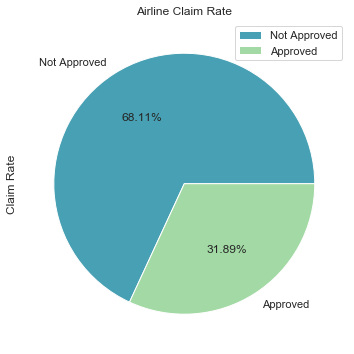

In [82]:
#AT: airlines

atcr[:2]['Claim Rate'].plot(kind='pie',labels = ['Not Approved','Approved'], autopct = '%1.2f%%', figsize=(6,6))
plt.legend()
plt.title('Airline Claim Rate')#,fontdict = {'fontsize': 20})
# plt.ylabel('Claim Rate',fontdict = {'fontsize': 20})
plt.show()

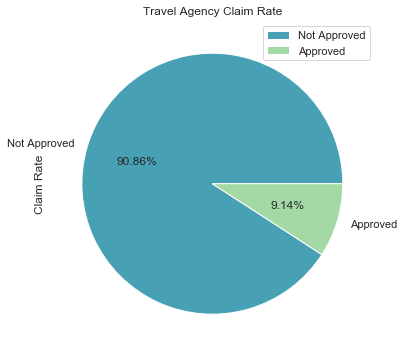

In [83]:
#AT: travel agency

atcr[2:4]['Claim Rate'].plot(kind='pie',labels = ['Not Approved','Approved'], autopct = '%1.2f%%', figsize=(6,6))
plt.legend()
plt.title('Travel Agency Claim Rate')
plt.show()

In [84]:
# fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 6))
# fig.suptitle('Claim approval rate according to Agency Type')

# atcr[:2]['Claim Rate'].plot(kind='pie',labels = claim_labels, autopct = '%1.2f%%', colors = dual_colors, ax=ax1)
# atcr[2:4]['Claim Rate'].plot(kind='pie',labels = claim_labels, autopct = '%1.2f%%', colors = dual_colors, ax=ax2)
# ax1.set_ylabel('')
# ax1.set_title('Agency Type: Airlines')
# ax2.set_ylabel('')
# ax2.set_title('Agency Type: Travel Agency')

# ax1.legend(loc='upper right',bbox_to_anchor=(1.3, 0.9))
# plt.show()

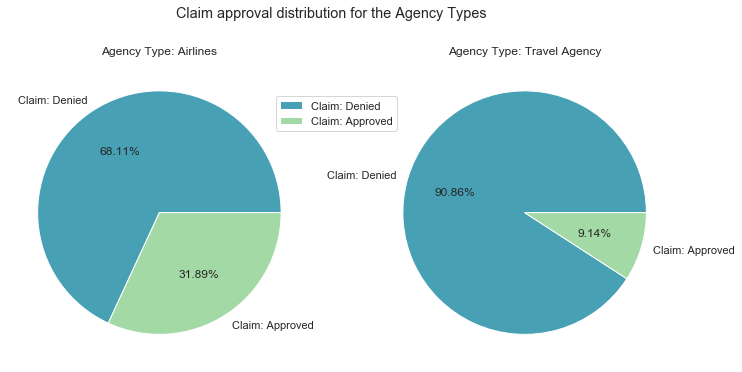

In [85]:
# side by side - final
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 6))
fig.suptitle('Claim approval distribution for the Agency Types',fontdict={'fontsize':14})

atcr[:2]['Claim Rate'].plot(kind='pie',labels = claim_labels, autopct = '%1.2f%%', ax=ax1)
atcr[2:4]['Claim Rate'].plot(kind='pie',labels = claim_labels, autopct = '%1.2f%%', ax=ax2)
ax1.set_ylabel('')
ax1.set_title('Agency Type: Airlines')
ax2.set_ylabel('')
ax2.set_title('Agency Type: Travel Agency')

ax1.legend(loc='upper right',bbox_to_anchor=(1.3, 0.9))
plt.show()